#Business Case

**Business Case:** Enhancing Restaurant Compliance and Public Health with Predictive Analytics

**Company Name:** Healthgrade Solutions  



---



. Introduction to Business Case

HealthGrade Solutions (HGS) aims to leverage predictive analytics based on the DOHMH New York City Restaurant Inspection Results dataset in order to address the issue of faulty restaurant compliance (low hygiene scores) with health and safety regulations for restaurants/food establishments. HGS aims to assist emerging restaurant owners and the Department of Health and Mental Hygiene (DOHMH) in improving compliance and ensuring public health and safety in New York City. This will be done by harnessing data analytics and machine learning algorithms.

Based in New York City, HGS aims to address the concerns of all stakeholders involved in the restaurant and public safety market.

Stakeholders:

DOHMH: As food and safety advisors, the DOHMH has several goals, including:

Preventing foodborne illnesses
Educating restaurant owners and staff in matters of hygiene and food safety.
Assessing and grading establishments based on their level of compliance.
Overall, they aim to minimize the risk of foodborne illnesses and outbreaks by enforcing strict sanitation standards and regulations. All of which are summarized by the score they appoint to a specific establishment. Having an ML model that can accurately predict the score of an establishment can help the DOHMH in the following ways:

Improved Efficiency: The DOHMH could prioritize inspections based on establishments more likely to have lower hygiene scores. This targeted approach allows them to allocate their resources more efficiently and become more effective.

Proactive Intervention: Predictive models can help the DOHMH identify establishments at risk of poor hygiene scores. This enables them to intervene proactively, provide guidance and support to improve hygiene practices and prevent potential consumer health risks.

Restaurants: Achieving appropriate sanitation scores can benefit old and new restaurant owners as this can directly enhance their reputation and performance. Furthermore, ensuring that they comply with and satisfy all of the expectations of the health department and their goals of safeguarding public health through regulatory compliance and disease prevention practices, will also mean that the establishment is better equipped to offer their consumers an overall safer and better dining experience. Ultimately increasing the efficiency and profitability of the establishment.

HGS aims to implement a Software as a Service (SaaS) model for their revenue streams, offering their software solutions to both new restaurants and the DOHMH. By offering their software as a service HGS can provide valuable tools and insights that contribute to improved compliance with health and safety regulations, reduced risk of foodborne illnesses, and enhanced public health outcomes in New York City. Not only this, but a SaaS model also offers a scalable and sustainable revenue stream for HGS, as they continue to expand their offerings and reach new clients in the restaurant industry.

#Understanding our Target (Grade)

Since July 2010, the Health Department has required restaurants to post letter grades showing sanitary inspection
results. Restaurants with a score between 0 and 13 points earn an A, those with 14 to 27 points receive a B and those with 28
or more a C. Inspection results are posted on the Health Department’s website

#Load Dataset & Libraries

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Adjust the path below to where your CSV file is located in Google Drive
file_path = '/content/drive/MyDrive/BAN A/DOHMH_New_York_City_Restaurant_Inspection_Results_20240301.csv'
df = pd.read_csv(file_path)



Mounted at /content/drive


In [ ]:
df.head(10)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50143283,APARTMENT 7B DELI & MARKET,Queens,JFK,INTL AIRPORT,11430.0,7037237264,NaN,01/01/1900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50142362,NaN,Manhattan,3878,BROADWAY,10032.0,9294315279,NaN,01/01/1900,NaN,...,NaN,40.837076,-73.942654,112.0,10.0,24500.0,1062854.0,1.021200e+09,MN36,NaN
2,50127403,KHAOSAN NYC,Brooklyn,128,MONTAGUE STREET,11201.0,3472940179,Thai,12/20/2022,No violations were recorded at the time of thi...,...,Administrative Miscellaneous / Re-inspection,40.694700,-73.994021,302.0,33.0,502.0,3002077.0,3.002490e+09,BK09,NaN
3,50062556,THEP,Manhattan,1439,2 AVENUE,10021.0,2128999995,Thai,04/04/2022,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.770656,-73.957019,108.0,4.0,13400.0,1044032.0,1.014290e+09,MN31,NaN
4,50146182,NaN,Brooklyn,406,86 STREET,11209.0,9172702985,NaN,01/01/1900,NaN,...,NaN,40.622589,-74.028036,310.0,43.0,16000.0,3153522.0,3.060450e+09,BK31,NaN
5,50144764,Heaven and Earth,Brooklyn,290,NASSAU AVENUE,11222.0,3122864272,NaN,01/01/1900,NaN,...,NaN,40.726114,-73.939106,301.0,33.0,59300.0,3067335.0,3.026910e+09,BK76,NaN
6,50146942,NaN,Queens,150,50TH AVE,11101.0,6467509156,NaN,01/01/1900,NaN,...,NaN,40.743635,-73.958877,402.0,26.0,100.0,4541370.0,4.000068e+09,QN31,NaN
7,50118787,USA BROOKLYN DELICATESSEN,Manhattan,7,EAST 27 STREET,10016.0,6469271619,NaN,01/01/1900,NaN,...,NaN,40.743836,-73.987196,105.0,3.0,5600.0,1016886.0,1.008570e+09,MN13,NaN
8,50131659,YES MAMA WINE BAR,Queens,4410,30TH AVE,11103.0,9177330703,NaN,01/01/1900,NaN,...,NaN,40.762292,-73.911624,401.0,22.0,15100.0,4012638.0,4.007130e+09,QN70,NaN
9,50142553,SOUL FOOD STATION,Staten Island,2220,FOREST AVENUE,10303.0,7186661199,NaN,01/01/1900,NaN,...,NaN,40.626807,-74.163189,501.0,49.0,30302.0,5141910.0,5.016850e+09,SI12,NaN


In [ ]:
df.shape

(216558, 27)

#Data Preprocessing

We are preparing the Data by removing missing values, removing irrelevant columns and checking data types.

##Drop Features not needed for analysis

**Unneeded Data**
1. CAMIS - Unique Identifier
2. DBA - Restaurant Name
3. Building - Unneeded location data
4. Street - Unneeded location data
5. Zipcode - Unneeded location data
6. Phone - Unique Numbers and unneccessary
7. Violation Description - Unnecessary text data. Violation code to be used instead.
8. Inspection Type - Not needed for analysis
9. Latitude - Unneeded location data
10. Longititude - Unneeded location data
11. Community Board - No description found for the data nor can any be inferred
12. Council District - No description found for the data nor can any be inferred
13. BIN - No description found for the data nor can any be inferred
14. BBL - No description found for the data nor can any be inferred
15. NTA - No description found for the data nor can any be inferred
16. Location Point 1 - No description found for the data nor can any be inferred
17. Record Date - Date of data extraction
18. Census Tract - No description found for the data nor can any be inferred
19. Grade Date - Not needed for analysis. Inspection date is already present.
20. **Score* - Grade is the Y variable, which is a transformation of the Score variable. Therefore, they are telling us the same thing, which is why it was decided to eliminate Score**

These variables were dropped using domain knowledge via the information from the Data Dictionary

*score will be dropped later on in the code. It will be dropped before modelling.


In [ ]:
# Drop irrelevant features
df.drop(columns=['CAMIS', 'DBA', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'Community Board', 'GRADE DATE','Council District', 'Census Tract', 'Latitude','Longitude', 'RECORD DATE', 'BIN', 'BBL', 'NTA', 'VIOLATION DESCRIPTION','Location Point1', 'INSPECTION TYPE'], inplace=True)

df.shape

(216558, 8)

**Rational for keeping the 7 columns left**

1. BORO - Needed to see if there is correlation between location and any other features.
2. Cuisine Description - Needed to see if there is correlation between Cuisine and other features. Based on our domain knowledge, they type of food a restaurant makes can directly affect their food handling procedures.
3. Inspection Date - Kept to see if there is correlation between Inspection Date and other features.
4. Action - Kept to identify the most recurring action taken
5. Violation Code - Kept to see the most recurring Violations Categories
6. Critical Flag - Need in order to identify the wether a violation was critical to public safety or not.
7. Grade - target for model analysis


#Understanding our features

- BORO - The borough where the restaurant is located (Manhattan, Bronx, Brooklyn, Queens, or Staten Island).

- Cuisine Description -  The type of cuisine served by the restaurant

- Inspection Date - The action taken as a result of the inspection (e.g., Violations were cited, No violations were recorded, Establishment was closed).

- Action - The code associated with each specific violation

- Violation Code -  Indicates whether the violation is critical to public health (Critical or Not Critical).

- Critical Flag - The inspection score given to the restaurant.

- Grade - The letter grade assigned to the restaurant  (A, B, C, or Z)

In [ ]:
df.head()

,BORO,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,CRITICAL FLAG,SCORE,GRADE
0,Queens,NaN,01/01/1900,NaN,NaN,Not Applicable,NaN,NaN
1,Manhattan,NaN,01/01/1900,NaN,NaN,Not Applicable,NaN,NaN
2,Brooklyn,Thai,12/20/2022,No violations were recorded at the time of thi...,NaN,Not Applicable,NaN,NaN
3,Manhattan,Thai,04/04/2022,Violations were cited in the following area(s).,09B,Not Critical,56.0,NaN
4,Brooklyn,NaN,01/01/1900,NaN,NaN,Not Applicable,NaN,NaN


##Check for Missing Values

In [ ]:
import pandas as pd

# Count the number of missing values per column
missing_values_count = df.isnull().sum()

# Print the count of missing values per column
print(missing_values_count)


BORO                        0
CUISINE DESCRIPTION      2445
INSPECTION DATE             0
ACTION                   2445
VIOLATION CODE           3570
CRITICAL FLAG               0
SCORE                   10487
GRADE                  110874
dtype: int64


###Percantage of Missing Values per feature

In [ ]:
# Calculate the percentage of missing values for each feature
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display the percentage of missing values for each feature
print("Percentage of missing values in each feature:")
print(missing_percentage)


Percentage of missing values in each feature:
BORO                    0.000000
CUISINE DESCRIPTION     1.129028
INSPECTION DATE         0.000000
ACTION                  1.129028
VIOLATION CODE          1.648519
CRITICAL FLAG           0.000000
SCORE                   4.842583
GRADE                  51.198293
dtype: float64


The missing values for each column are put in a percentage to easily view the ratio of missing values to the data.

The biggest ones is GRADE with 51% missing values

###Inspecting GRADE

In [ ]:
df[['GRADE', 'INSPECTION DATE']].head(10)


,GRADE,INSPECTION DATE
0,NaN,01/01/1900
1,NaN,01/01/1900
2,NaN,12/20/2022
3,NaN,04/04/2022
4,NaN,01/01/1900
5,NaN,01/01/1900
6,NaN,01/01/1900
7,NaN,01/01/1900
8,NaN,01/01/1900
9,NaN,01/01/1900


We added INSPECTION DATE because we found that most of the missing values from the columns GRADE and INSPECTION DATE are because they are dated back to 1900. Inspection dates of 1/1/1900 mean an establishment has not yet had an inspection. Since an establishment has not been graded there would not any contributing data entries to our analysis, so no data integrity in that way.

##Dropping missing values

In [ ]:
df.shape

(216558, 8)

In [ ]:
# Making an original copy of df to avoid SettingWithCopyWarning
df1 = df.copy()

# Now perform all operations directly on df1
# Dropping rows where 'GRADE' is missing
df1 = df1.dropna()

df1.shape

(105237, 8)

In [ ]:
# Count the number of missing values per column
missing_values_count = df1.isnull().sum()

# Print the count of missing values per column
print(missing_values_count)

BORO                   0
CUISINE DESCRIPTION    0
INSPECTION DATE        0
ACTION                 0
VIOLATION CODE         0
CRITICAL FLAG          0
SCORE                  0
GRADE                  0
dtype: int64


All missing values have been removed. We can continue to the next stage of preprocessing.

##Data Types

In [ ]:
#Check Data Types to make sure all is in order
df1.dtypes

BORO                    object
CUISINE DESCRIPTION     object
INSPECTION DATE         object
ACTION                  object
VIOLATION CODE          object
CRITICAL FLAG           object
SCORE                  float64
GRADE                   object
dtype: object

**BORO**: A category field, typically saved as an object (a string in pandas), that probably represents several boroughs.

**CUISINE DESCRIPTION**: An object that is also saved as a categorical field that describes different cuisines.

**INSPECTION DATE**: A field that probably contains the dates of inspections; it may be object-stored and require conversion to datetime type in order to be used in time series analysis.

**ACTION**: A field that is saved as an object that describes actions that were taken, maybe as a result of the inspection.

**VIOLATION CODE**: An object-stored categorical field that contains codes for various kinds of infractions.

**CRITICAL FLAG**: An object-stored field that probably should have been a boolean, indicating if a violation is critical.
SCORE: A float64 number field that most likely indicates a score given during the examination.

**GRADE**: An object that is maintained as a category field that indicates a grade and may be the outcome of an inspection.

With the exception of the numerical field "SCORE," the summary shows that the majority of the fields are textual or categorical. Preprocessing, such as converting dates and maybe boolean flags to more suitable data types for analysis, may be necessary based on the data types.


###Changing Data Types

####Treating for Cuisine Description

In [ ]:
#Cuisines Desciption
df1['CUISINE DESCRIPTION'] = df1['CUISINE DESCRIPTION'].astype('category').copy()



CUISINE DESCRIPTION: Changing from Object to Category

####Treating for Inspection Date

In [ ]:
#Specifying Data Format for Data Type conversion
df1['INSPECTION DATE'] = pd.to_datetime(df1['INSPECTION DATE'], format='%m/%d/%Y')



INSPECTION DATE: Shaping Date Structure; which is American month/day/year

####Treating for Action

In [ ]:
#Shortening the text to potentially do a later in the analysis

# Define the mapping of the old text to the new text
text_mapping = {
    "Violations were cited in the following area(s).": "Violations Cited",
    "No violations were recorded at the time of this inspection.": "No Violations",
    "Establishment re-opened by DOHMH.": "Re-opened",
    "Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.": "Establishment Closed"
}

# Replace the full sentences with the shorter text in the 'ACTION' column
df1['ACTION'] = df1['ACTION'].replace(text_mapping)

# Verify the changes
unique_values_count = df1['ACTION'].value_counts()

# Display the unique values and their counts
print(unique_values_count)

df1.head(5)


Violations Cited        103467
Re-opened                 1594
Establishment Closed       171
No Violations                5
Name: ACTION, dtype: int64


,BORO,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,CRITICAL FLAG,SCORE,GRADE
61,Brooklyn,American,2024-02-15,Violations Cited,09B,Not Critical,23.0,Z
89,Manhattan,Chinese,2023-11-08,Violations Cited,09B,Not Critical,34.0,Z
91,Queens,Pizza,2022-07-29,Violations Cited,02B,Critical,12.0,A
96,Bronx,Mexican,2023-11-27,Violations Cited,02B,Critical,11.0,A
106,Manhattan,American,2022-03-23,Violations Cited,10J,Not Critical,13.0,A


Shortening the text to make analysis easier

In [ ]:
df1['ACTION'] = df1['ACTION'].astype('category')

Changing ACTION type to category

####Treating for BORO

In [ ]:
# Making the BORO column Category type
df1['BORO'] = df1['BORO'].astype('category')
df1.dtypes

BORO                         category
CUISINE DESCRIPTION          category
INSPECTION DATE        datetime64[ns]
ACTION                       category
VIOLATION CODE                 object
CRITICAL FLAG                  object
SCORE                         float64
GRADE                          object
dtype: object

Changing BORO type to category

####Treating for VIOLATION CODE

In [ ]:
df1['VIOLATION CODE'] = df1['VIOLATION CODE'].astype('category')

Changing type to category

#### Treating for CRITICAL FLAG

In [ ]:
df1['CRITICAL FLAG'] = df1['CRITICAL FLAG'].astype('category')

Changing type to category

####Treating for GRADE

In [ ]:
df1['GRADE'] = df1['GRADE'].astype('category')

###Final dtypes

In [ ]:
df1.dtypes

BORO                         category
CUISINE DESCRIPTION          category
INSPECTION DATE        datetime64[ns]
ACTION                       category
VIOLATION CODE               category
CRITICAL FLAG                category
SCORE                         float64
GRADE                        category
dtype: object

#Statistical Description

In [ ]:
df1.describe()

,SCORE
count,105237.000000
mean,15.685225
std,12.366372
min,0.000000
25%,9.000000
50%,12.000000
75%,18.000000
max,168.000000


Count: The dataset has 105,237 scores. This is the total number of records that have 'SCORE' values that are not missing.

Mean: 15.69 is the average score for all records combined. This represents the inspection scores' arithmetic average.

Standard Deviation (std): The standard deviation, which expresses how far the scores vary or spread from the mean, is roughly 12.37. The scores are more evenly distributed over a larger range of values when the standard deviation is larger.

Minimum (min): The dataset's smallest score is 0. A score of 0 can mean there are no infractions or complete compliance if the score indicates violations or points deducted for non-compliance.

25% of the scores fall inside the 9th percentile or lower. If lower scores correspond to better compliance, this first quartile shows that 25% of the firms have pretty decent scores.

The median score, or 50th percentile, is 12. This value divides the dataset in half equally and represents the middle score when all scores are organized in ascending order. Of the scores, half are higher than 12 and half are lower.

75th Percentile: 75 percent of the scores fall between 18 and 19. With a quarter of the establishments scoring lower than 18, this third quartile indicates that three-quarters of the enterprises have scores of 18 or higher.

Maximum (max): The dataset's maximum score is 168. Given the assumption that higher ratings correspond to lower compliance, this would be an anomaly that represents a business with a high number of infractions.

If the scoring system penalizes for violations, the objective in the context of health inspections is usually to have scores as low as possible. A high mean or median could indicate that compliance could be improved overall. High ratings (around the maximum) may indicate establishments with serious health problems, necessitating focused interventions.

#EDA

##Univariate

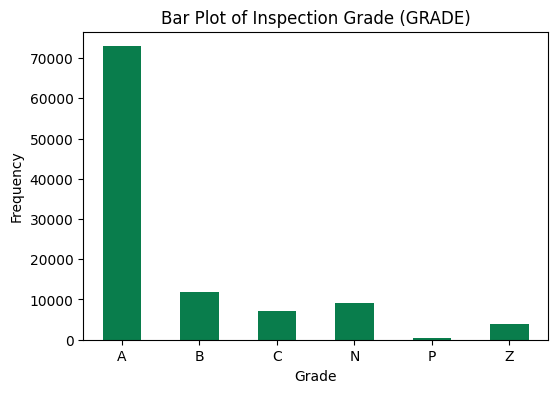

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
df1['GRADE'].value_counts().sort_index().plot(kind='bar', color='#097D4C')  # Change color here
plt.title('Bar Plot of Inspection Grade (GRADE)')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


The histogram above depicts the frequency of different inspection grades given to restaurants by the Department of Health and Mental Hygiene (DOHMH) in New York City.

- A = 0–13 points (score)
- B = 14–27 points (score)
- C = 28+ points (score)
- N = Not yet graded (score)
- P = Grade pending issued on re-opening (score)
- Z = Grade pending (score)

The tallest bar corresponds to grade A, this indicates that over 70,000 inspections resulted in this letter grade.

Grades B and C have significantly lower frequencies.

Grades N, P, and Z have minimal frequencies when compared to the other grades.

- Overall Trend:
Most restaurants received an “A” grade, suggesting a high overall level of compliance with health standards among NYC restaurants.

Although fewer restaurants received lower grades (B and C) some are still present, indicating areas for improvement.

In summary, the majority of restaurants in New York City maintain good hygiene practices, but there’s room for improvement for some establishments.

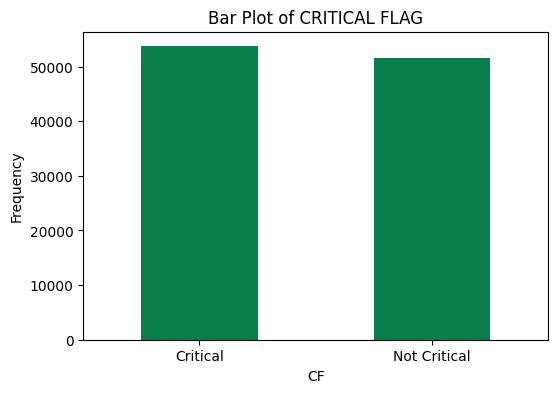

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
df1['CRITICAL FLAG'].value_counts().sort_index().plot(kind='bar', color='#097D4C')  # Change color here
plt.title('Bar Plot of CRITICAL FLAG')
plt.xlabel('CF')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


The bar plot above represents the frequency of the different categories of the CRITICAL FLAG feature.

- Grade Categories:
 Critical, Not Applicable, and Not Critical.

The bars for both Critical and Not Critical reach approximately above 50,000. However, the Critical bar is slightly higher.

The middle bar labeled as “Not Applicable” has no height, indicating a frequency of zero.

- Overall Trend:
Violations classified as “Critical” are essential for public health and safety as they pose a significant risk of contamination. Its presence suggests areas for improvement in critical aspects.

- In summary, while most violations are not critical, addressing all types of violations is crucial for maintaining restaurant hygiene and safety.

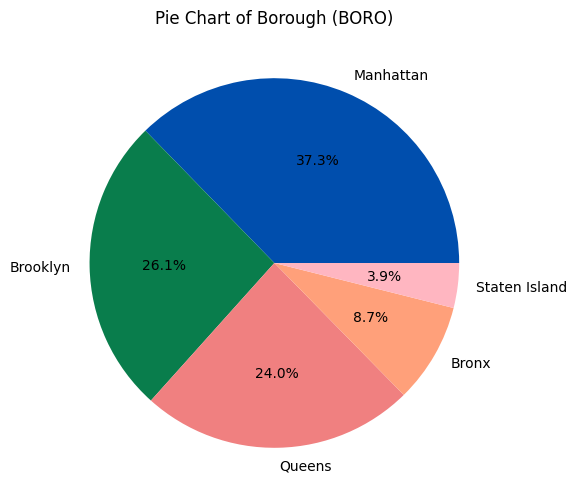

In [ ]:
# Plot pie chart for BORO feature
plt.figure(figsize=(6,6))
df1['BORO'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#004EAD', '#097D4C', 'lightcoral', 'lightsalmon', 'lightpink'])
plt.title('Pie Chart of Borough (BORO)')
plt.ylabel('')
plt.show()



The pie chart illustrates the distribution of different boroughs in the dataset.

- Manhattan: Occupies the largest segment (37.3%).
- Brooklyn: The second-largest segment (26.1%).
- Queens: Represents 24.1%.
- Bronx: A smaller portion (8.7%).
- Staten Island: The smallest slice (3.9%).

Manhattan has the highest presence in the dataset, followed by Brooklyn and Queens. Bronx and Staten Island have smaller proportions.

This distribution helps us locate which areas to target for our initial launch.

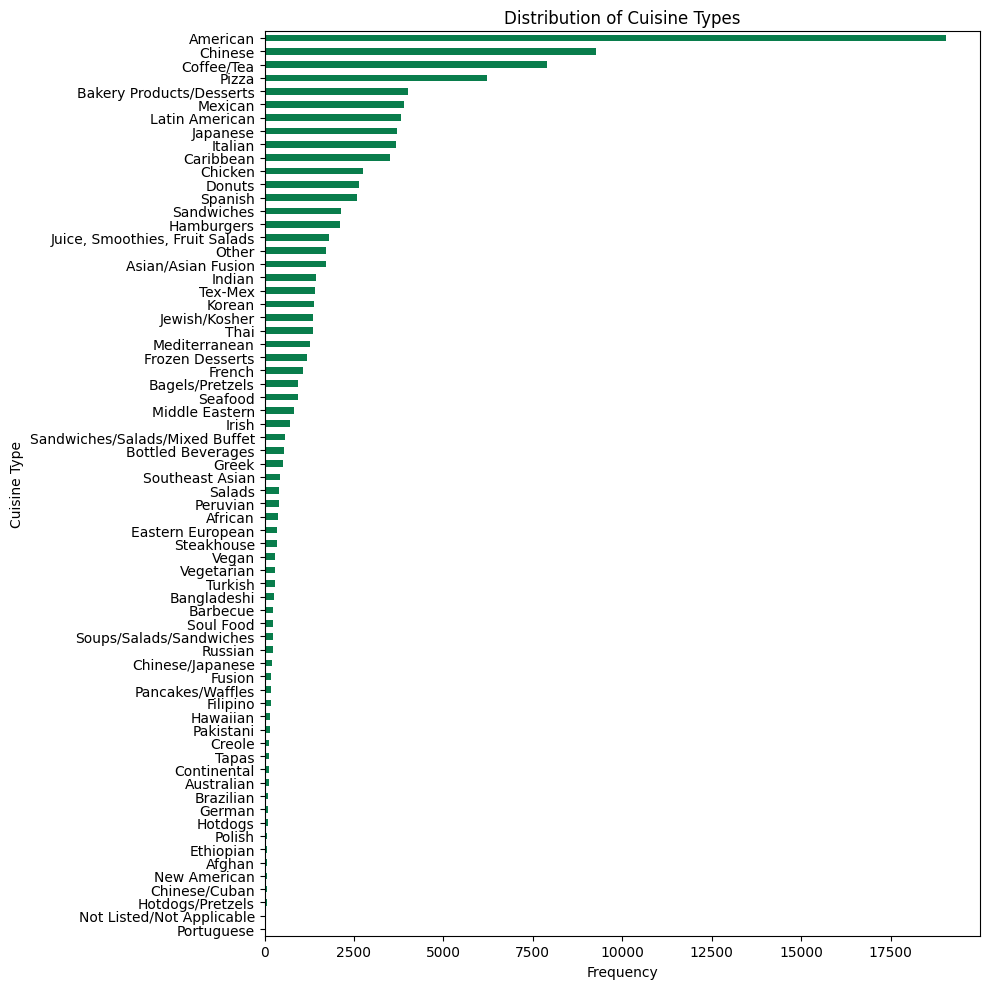

In [ ]:
import matplotlib.pyplot as plt

# Calculate frequency of each cuisine type
cuisine_counts = df1['CUISINE DESCRIPTION'].value_counts()

# Sort cuisine types by frequency in descending order
cuisine_counts_sorted = cuisine_counts.sort_values(ascending=False)

# Exclude the last 21 cuisine types
cuisine_counts_sorted = cuisine_counts_sorted[:-21]

# Plot bar plot with flipped axis
plt.figure(figsize=(10, 10))
cuisine_counts_sorted.plot(kind='barh', color='#097D4C')  # Use barh for horizontal bar plot
plt.title('Distribution of Cuisine Types')
plt.xlabel('Frequency')
plt.ylabel('Cuisine Type')
plt.gca().invert_yaxis()  # Invert y-axis to display cuisine types in descending order

# Set y-ticks with a stride to skip some labels for better readability
plt.yticks(range(0, len(cuisine_counts_sorted.index), 1), cuisine_counts_sorted.index[::1])

plt.tight_layout()
plt.show()


The plot above depicts the frequency of each CUISINE DESCRIPTION (food type) in the dataset.

The top 5 cuisine types in the dataset are
- American
- Chinese
- Tea/coffee
- Pizza
- Bakery

Based on this distribution, we can expect American food to dominate different aspects of the dataset. Aspects such as: Violation per Food types or Food types per borough. Further EDA is requiered to confirm.


##Bivariate

###Bar Plot

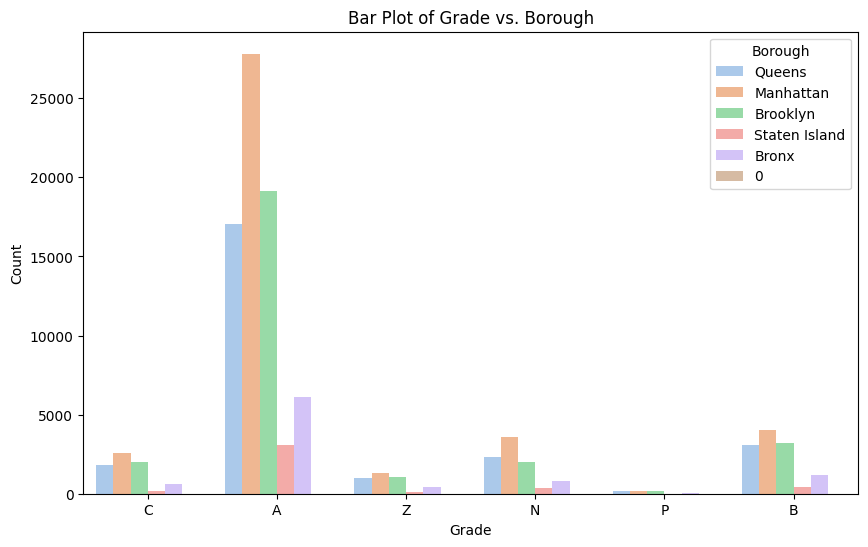

In [ ]:
# Plot bar plot for GRADE vs. BORO
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='GRADE', hue='BORO', palette='pastel')
plt.title('Bar Plot of Grade vs. Borough')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Borough')
plt.show()


The bar plot above illustrates the distribution of restaurant grades across different boroughs in New York City.

- Each borough has bars corresponding to different restaurant grades.

- Grade A:
Manhattan has the highest count of restaurants with an “A” grade, exceeding 20,000. Brooklyn follows with a substantial number of Grade A establishments.

- Z, N, C, B, and P have significantly lower counts across all boroughs.

Staten Island has the lowest counts for all grades.

Overall Trend:
Grade A is the most common, indicating good compliance with health standards.
Brooklyn and Queens also have notable Grade A establishments.


###Correlation Matrix

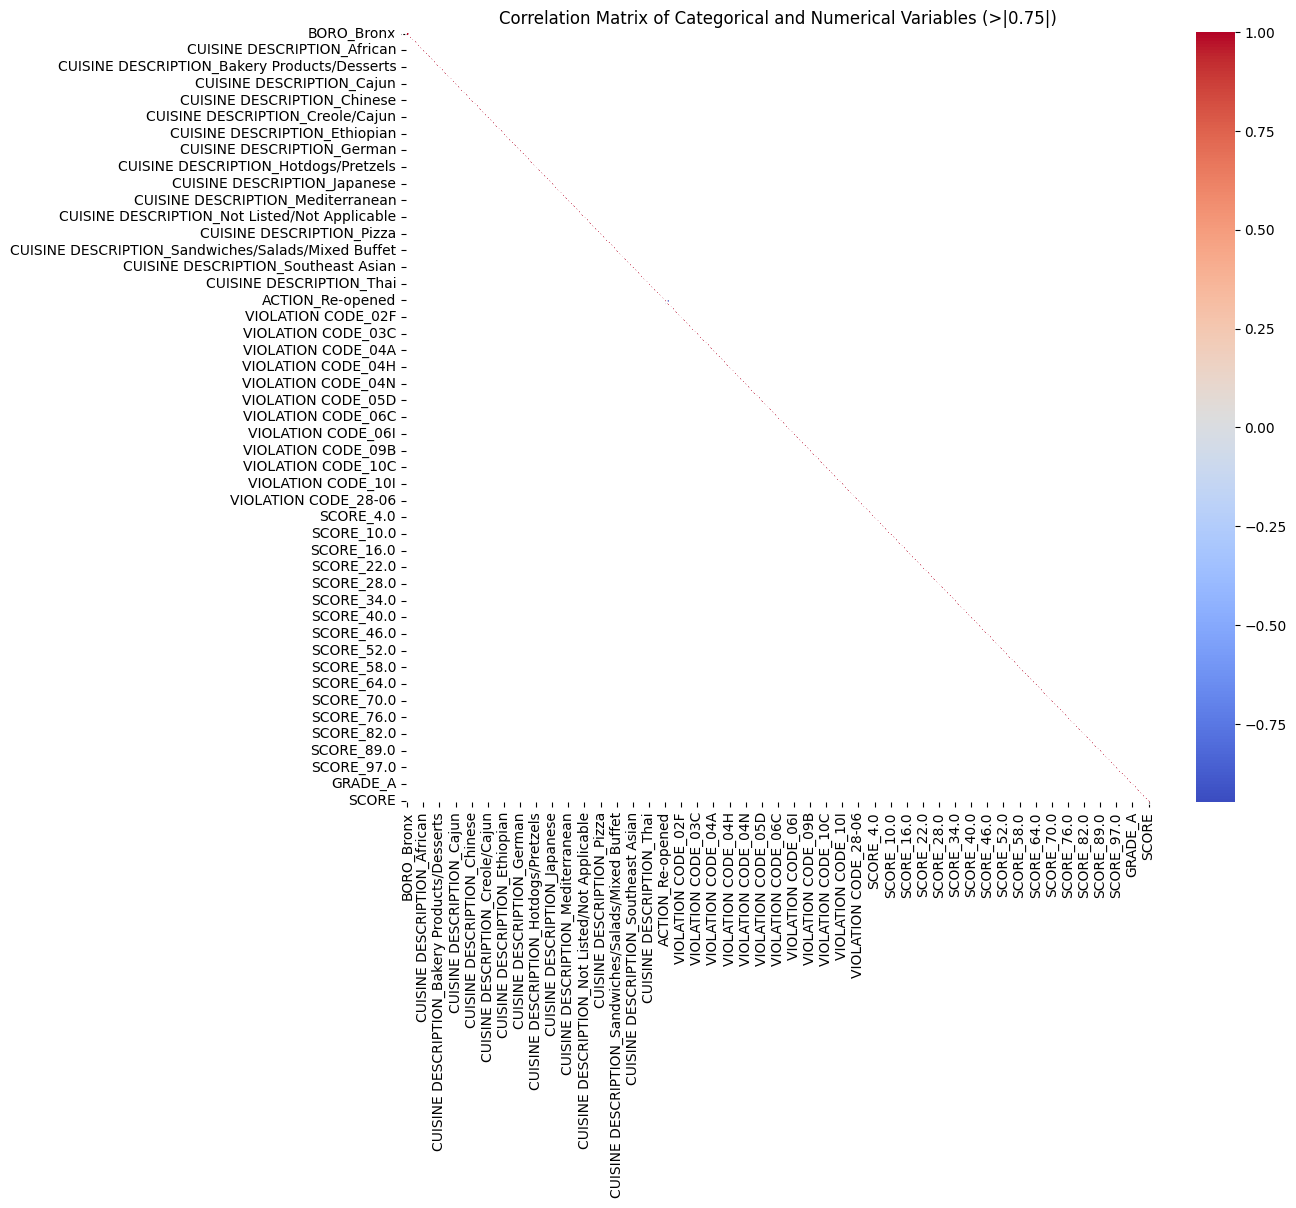

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder

df_encoded = pd.DataFrame()  # DataFrame to hold encoded variables


# Label Encoding for binary/ordinal variables
for col in df1.select_dtypes(include=['object', 'category', 'float64']).columns:
    if len(df1[col].unique()) <= 2:
        df_encoded[col] = LabelEncoder().fit_transform(df1[col])
    else:
        # One-Hot Encoding for nominal variables
        dummies = pd.get_dummies(df1[col], prefix=col)
        df_encoded = pd.concat([df_encoded, dummies], axis=1)

# Add numerical variables to df_encoded
for col in df1.select_dtypes(include=[np.number]).columns:
    df_encoded[col] = df1[col]

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Set values below the threshold (0.75) to NaN so they aren't displayed
strong_correlations = correlation_matrix.where(np.abs(correlation_matrix) >= 0.75)

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(strong_correlations, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title("Correlation Matrix of Categorical and Numerical Variables (>|0.75|)")
plt.show()


From the one-hot encoded correlation matrix, we can see the filter that makes it displays only significant correlation greater than 75%. But there is seems to be no significant correlation between the variables.

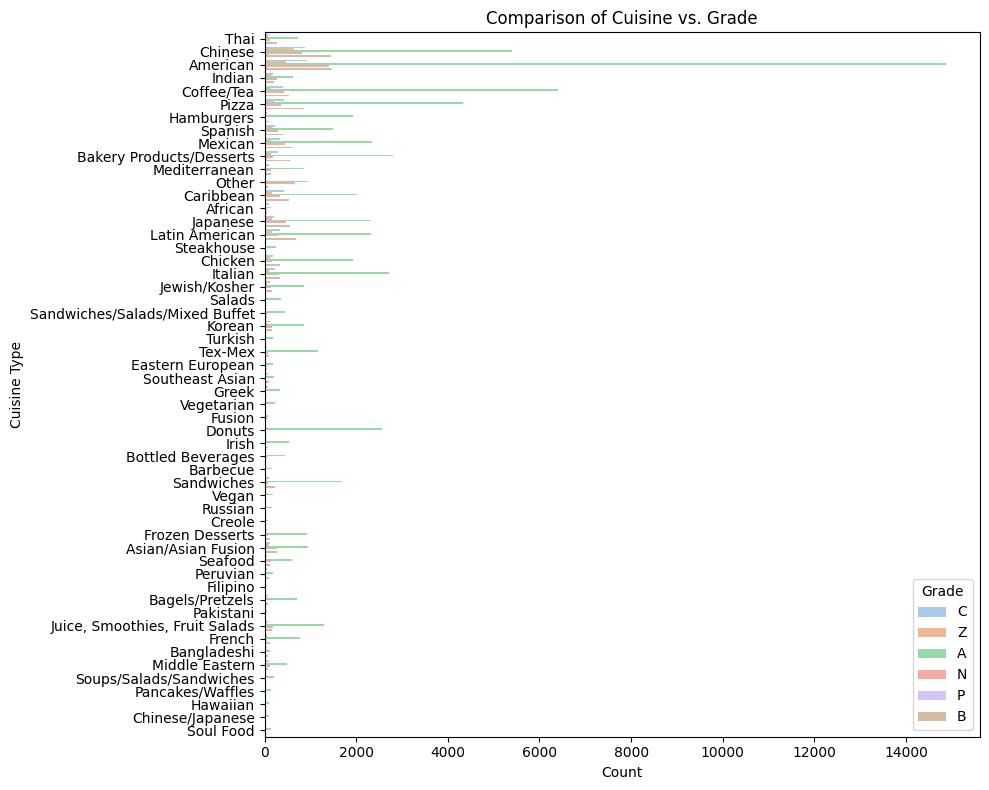

In [ ]:
import seaborn as sns

# Exclude the last 17 cuisine types
top_cuisine_types = df['CUISINE DESCRIPTION'].value_counts().iloc[:-35].index

# Filter the DataFrame to include only the top cuisine types
df_filtered = df[df['CUISINE DESCRIPTION'].isin(top_cuisine_types)]

# Plot horizontal bar plot for CUISINE DESCRIPTION vs GRADE
plt.figure(figsize=(10, 8))
sns.countplot(data=df_filtered, y='CUISINE DESCRIPTION', hue='GRADE', palette='pastel')
plt.title('Comparison of Cuisine vs. Grade')
plt.xlabel('Count')
plt.ylabel('Cuisine Type')
plt.legend(title='Grade')
plt.tight_layout()
plt.show()


The bar plot above represents the distribution of restaurant grades across different cuisine types in New York City.

- As predicted, American food has the highest number of grades appointed, this is because, as mentioned earilier, American food is the most prominent food type in the dataset.

- Represented by the color blue, it is clear how most grades appointed in the dataset are As. Indicating good compliance with health standards across all food types in the dataset.

##Multivariate

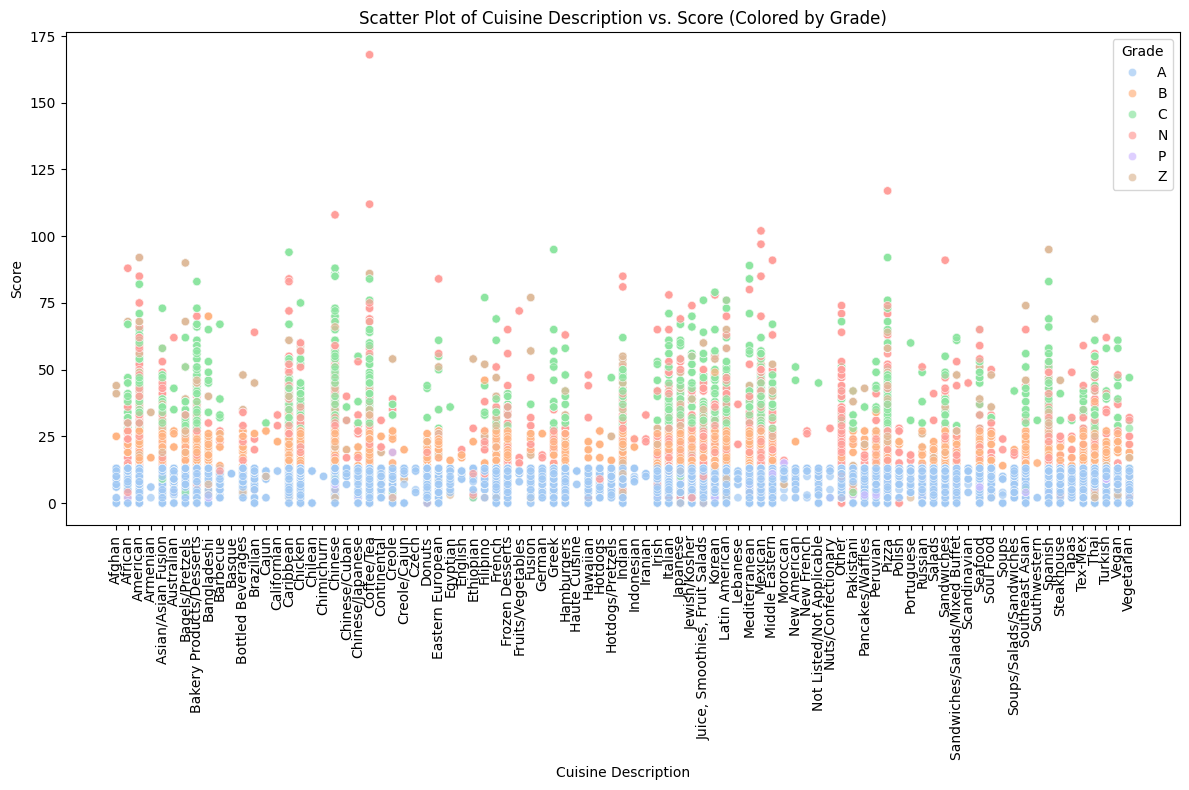

In [ ]:
import seaborn as sns

# Plot scatter plot for CUISINE DESCRIPTION vs. SCORE, colored by GRADE
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df1, x='CUISINE DESCRIPTION', y='SCORE', hue='GRADE', palette='pastel', alpha=0.7)
plt.title('Scatter Plot of Cuisine Description vs. Score (Colored by Grade)')
plt.xlabel('Cuisine Description')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.legend(title='Grade')
plt.tight_layout()
plt.show()


The scatterplot above depicts the relationship between cuisine type and scores, colored by each corresponding grade.

As explained previously,
- A = 0–13 points (score)
- B = 14–27 points (score)
- C = 28+ points (score)
- N = Not yet graded (score)
- P = Grade pending issued on re-opening (score)
- Z = Grade pending (score)


 The scatter plot displays a type of inverse relationship between score and grade. As the score increases, the grad letter decreases (in a non numerical value kind of way)

In the scatter plot above, the density of plot decreases (upwards) as score increases.

 As we saw before, the most prominent letter grade (A) has the clusters with the most density.

#Data Transformation


In [ ]:
# Check data types of each feature
data_types = df1.dtypes

# Display the data types
print("Data types of each feature:")
print(data_types)


Data types of each feature:
BORO                         category
CUISINE DESCRIPTION          category
INSPECTION DATE        datetime64[ns]
ACTION                       category
VIOLATION CODE               category
CRITICAL FLAG                category
SCORE                         float64
GRADE                        category
dtype: object


Examining the data types first

###BORO

In [ ]:
# Get unique values of the 'column_name' column
unique_values = df1['BORO'].unique()

print(unique_values)

['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island']
Categories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']


In [ ]:
#BORO
mappings = {'0': 0, 'Manhattan': 1, 'Brooklyn': 2, 'Queens': 3, 'Bronx': 4, 'Staten Island': 5}

df1['BORO'] = df1['BORO'].replace(mappings)

Mapping numbers to BORO for modelling preparation

###CUISINE DESCRIPTION

In [ ]:
# Get unique values of the 'column_name' column
unique_values = df1['CUISINE DESCRIPTION'].unique()

print(unique_values)

['American', 'Chinese', 'Pizza', 'Mexican', 'Indian', ..., 'Chimichurri', 'Not Listed/Not Applicable', 'Haute Cuisine', 'Armenian', 'Chilean']
Length: 89
Categories (89, object): ['Afghan', 'African', 'American', 'Armenian', ..., 'Thai', 'Turkish',
                          'Vegan', 'Vegetarian']


In [ ]:
#Cuisine description
mappings = {}
i = 0

for cuisine_description in unique_values:
  mappings[cuisine_description ] = i
  i += 1

df1['CUISINE DESCRIPTION'] = df1['CUISINE DESCRIPTION'].replace(mappings)

Mapping numbers to CUISINE DESCRIPTION for modelling preparation

###ACTION

In [ ]:
# Get unique values of the 'column_name' column
unique_values = df1['ACTION'].unique()

print(unique_values)

['Violations Cited', 'Re-opened', 'Establishment Closed', 'No Violations']
Categories (4, object): ['Establishment Closed', 'No Violations', 'Re-opened', 'Violations Cited']


In [ ]:
#ACTION
mappings = {'Establishment Closed': 0, 'No Violations': 1, 'Re-opened': 2, 'Violations Cited': 3}

df1['ACTION'] = df1['ACTION'].replace(mappings)

Mapping numbers to ACTION for modelling preparation

###VIOLATION CODE

In [ ]:
# Get unique values of the 'column_name' column
unique_values = df1['VIOLATION CODE'].unique()

print(unique_values)

['09B', '02B', '10J', '04L', '04M', ..., '03F', '28-07', '04I', '03G', '22F']
Length: 72
Categories (72, object): ['02A', '02B', '02C', '02D', ..., '22G', '28-05', '28-06', '28-07']


In [ ]:
#VIOLATION CODE
mappings = {}
i = 0

for violation_code in unique_values:
  mappings[violation_code] = i
  i += 1

df1['VIOLATION CODE'] = df1['VIOLATION CODE'].replace(mappings)

Mapping numbers to VIOLATION CODE for modelling preparation

###CRITICAL FLAG

In [ ]:
# Get unique values of the 'column_name' column
unique_values = df1['CRITICAL FLAG'].unique()

print(unique_values)

['Not Critical', 'Critical']
Categories (2, object): ['Critical', 'Not Critical']


In [ ]:
#CRITICAL FLAG
mappings = {'Critical': 0, 'Not Critical': 1, 'Not Applicable': 2}

df1['CRITICAL FLAG'] = df1['CRITICAL FLAG'].replace(mappings)

Mapping numbers to CRITICAL FLAG for modelling preparation

###GRADE

In [ ]:
# Get unique values of the 'column_name' column
unique_values = df1['GRADE'].unique()

print(unique_values)

['Z', 'A', 'N', 'B', 'C', 'P']
Categories (6, object): ['A', 'B', 'C', 'N', 'P', 'Z']


In [ ]:
#GRADE
mappings = {'A':0, 'B':1, 'C':2, 'N':3, 'P':4, 'Z':5}

df1['GRADE'] = df1['GRADE'].replace(mappings)

Mapping numbers to GRADE for modelling preparation

In [ ]:
df1.head(10)

,BORO,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,CRITICAL FLAG,SCORE,GRADE
61,2,0,2024-02-15,3,0,1,23.0,5
89,1,1,2023-11-08,3,0,1,34.0,5
91,3,2,2022-07-29,3,1,0,12.0,0
96,4,3,2023-11-27,3,1,0,11.0,0
106,1,0,2022-03-23,3,2,1,13.0,0
111,3,4,2023-01-12,3,0,1,45.0,5
119,1,5,2022-11-18,3,0,1,22.0,3
120,2,0,2021-07-23,3,1,0,10.0,0
121,2,6,2024-02-01,3,1,0,29.0,3
130,1,7,2023-03-23,3,3,0,16.0,3


###INSPECTION DATE

In [ ]:

df1 = df1.drop(columns=['INSPECTION DATE'])


###SCORE

In [ ]:
df1 = df1.drop(columns=['SCORE'])

#Models

In [ ]:
df1.head(10)

,BORO,CUISINE DESCRIPTION,ACTION,VIOLATION CODE,CRITICAL FLAG,GRADE
61,2,0,3,0,1,5
89,1,1,3,0,1,5
91,3,2,3,1,0,0
96,4,3,3,1,0,0
106,1,0,3,2,1,0
111,3,4,3,0,1,5
119,1,5,3,0,1,3
120,2,0,3,1,0,0
121,2,6,3,1,0,3
130,1,7,3,3,0,3


## Baseline Logistic Regression

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Drop rows with missing values


X = df1.drop(columns=['GRADE'])
y = df1['GRADE']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = logistic_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###Model Evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7065754465982517
Precision: 0.5153498030672371
Recall: 0.7065754465982517
F1 Score: 0.5916392748260867


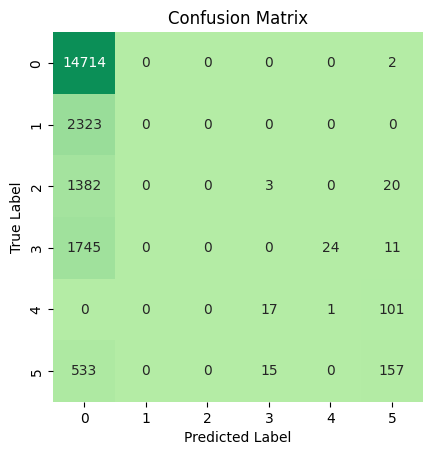

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from matplotlib.colors import LinearSegmentedColormap

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define the start and end color, using a lighter green and the specified green color
start_color = "#b4eca5"  # Lighter green
end_color = "#0b8f57"   # Specified darker green

# Create a custom colormap with a gradient from start_color to end_color
cmap = LinearSegmentedColormap.from_list("custom_heatmap", [start_color, end_color])

# Visualize the confusion matrix using the custom heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap, square=True, cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


**Accuracy**: 0.7065754465982517

An accuracy of approximately 0.707 means that about 70.7% of the model's predictions are correct.

**Precision**: 0.5153498030672371

A precision of 0.515 means that approximately 51.5% of the instances predicted by the model as positive are indeed positive.

**Recall**: 0.7065754465982517

The recall of 0.707 indicates that the model correctly identifies approximately 70.7% of all actual positive instances

**F1 Score**: 0.5916392748260867

 An F1 score of 0.592 suggests that the model is moderately effective at balancing precision and recall, but there is room for improvement, as this score ranges between 0 (worst) and 1 (best).

**Confusion Matrix**: The matrix shows that the model falsely misclassifies many categories

 **Summary**: The model is fair but does not meet a feasible threshold for use

##KBEST

We have a total of 5 features excluding the target. Our K will be 4

###KBest 1

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Apply k-best feature selection
k = 4  # Set the number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
all_feature_names = df1.columns
selected_feature_names = [all_feature_names[i] for i in selected_indices]

#Print the selected feature names
print("Selected Features:", selected_feature_names)


Selected Features: ['BORO', 'ACTION', 'VIOLATION CODE', 'CRITICAL FLAG']


In [ ]:
df1.head(10)

,BORO,CUISINE DESCRIPTION,ACTION,VIOLATION CODE,CRITICAL FLAG,GRADE
61,2,0,3,0,1,5
89,1,1,3,0,1,5
91,3,2,3,1,0,0
96,4,3,3,1,0,0
106,1,0,3,2,1,0
111,3,4,3,0,1,5
119,1,5,3,0,1,3
120,2,0,3,1,0,0
121,2,6,3,1,0,3
130,1,7,3,3,0,3


In [ ]:
# Separate features and target variable
X = df1[['BORO', 'ACTION', 'VIOLATION CODE', 'CRITICAL FLAG']]
y = df1['GRADE']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = logistic_reg.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###Model Evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7070505511212467
Precision: 0.5146373446511279
Recall: 0.7070505511212467
F1 Score: 0.5919809046770006


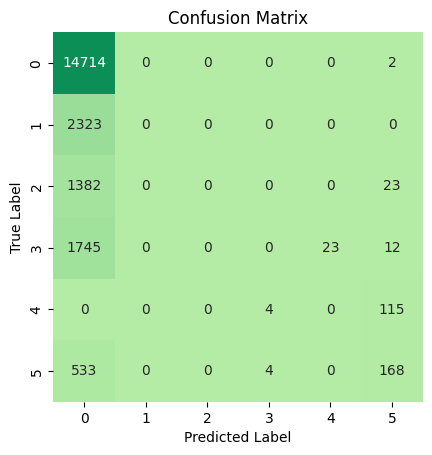

In [ ]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap, square=True, cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Accuracy**: 0.7070505511212467

An accuracy of approximately 0.707 suggests that around 70.7% of the model's predictions are accurate. This indicates a moderate level of overall correctness in predictions but doesn't provide insights into class-specific performance.

**Precision**: 0.5146373446511279

With a precision of roughly 0.515, it means that about 51.5% of the instances that the model predicted as positive are indeed positive. This relatively low precision indicates a high number of false positives, which is a concern in situations where incorrectly classifying negatives as positives has adverse consequences.

**Recall**: 0.7070505511212467

The recall, also at 0.707, implies that the model is able to correctly identify approximately 70.7% of the actual positive cases. High recall indicates a lower risk of false negatives but does not necessarily reflect the overall precision of the model.

**F1 Score**: 0.5918980946770006

The F1 score of about 0.592 is a metric that balances precision and recall, which is useful when seeking a model that does not excessively prioritize one over the other. In this case, the F1 score closer to the precision suggests that the model's balance is tilted towards correctly predicting positive instances only when it's quite certain, potentially at the cost of missing out on some positive instances.


**Confusion Matrix**: The matrix shows that the model falsely misclassifies many categories

 **Summary**: The model is fair but does not meet a feasible threshold for use

### KBest 2

In [ ]:

from sklearn.feature_selection import SelectKBest, f_regression

# Apply k-best feature selection
k = 3  # Set the number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
all_feature_names = df1.columns
selected_feature_names = [all_feature_names[i] for i in selected_indices]

#Print the selected feature names
print("Selected Features:", selected_feature_names)


Selected Features: ['CUISINE DESCRIPTION', 'ACTION', 'VIOLATION CODE']


In [ ]:
# Separate features and target variable
X = df1[['CUISINE DESCRIPTION', 'ACTION', 'VIOLATION CODE']]
y = df1['GRADE']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = logistic_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###Model Evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7070505511212467
Precision: 0.5149733600554085
F1 Score: 0.5920455550091236


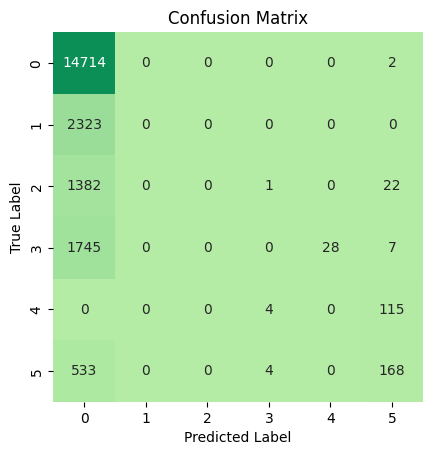

In [ ]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap, square=True, cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Accuracy**: 0.7069555302166477

The model is correct in 70.7% of its predictions.

**Precision**: 0.5147600169415796

Approximately 51.5% of the model's positive predictions are actually positive.

**F1 Score**: 0.591914073678913

The model has a moderate F1 score of 0.592, indicating a balance between precision and recall.

**Confusion Matrix**: The matrix shows that the model falsely misclassifies many categories

**Summary**: The model shows reasonable accuracy and recall but is limited by its precision, leading to a moderate F1 score.

###KBest 3

In [ ]:

from sklearn.feature_selection import SelectKBest, f_regression

# Apply k-best feature selection
k = 2  # Set the number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
all_feature_names = df1.columns
selected_feature_names = [all_feature_names[i] for i in selected_indices]

#Print the selected feature names
print("Selected Features:", selected_feature_names)


Selected Features: ['CUISINE DESCRIPTION', 'ACTION']


In [ ]:
# Separate features and target variable
X = df1[['ACTION', 'BORO']]
y = df1['GRADE']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = logistic_reg.predict(X_test)



###Model Evaluation

Accuracy: 0.7072405929304447
Precision: 0.5151692600215659
F1 Score: 0.5922643049837262


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


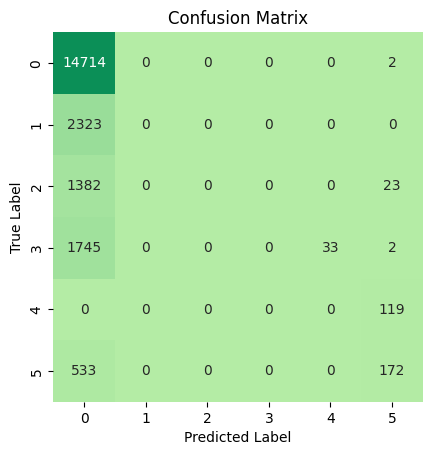

In [ ]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap, square=True, cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


**Accuracy**: 0.7072405929304447

About 70.7% of predictions are accurate.

**Precision**: 0.5151692600215659

Around 51.5% of predicted positives are correct.

**F1 Score**: 0.5922643049837262

The model has an F1 score of 0.592, reflecting a balance between precision and recall.

**Confusion Matrix**: The matrix shows that the model falsely misclassifies many categories

 **Summary**: The model is fair but does not meet a feasible threshold for use

###KBest 4

In [ ]:

from sklearn.feature_selection import SelectKBest, f_regression

# Apply k-best feature selection
k = 1  # Set the number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
all_feature_names = df1.columns
selected_feature_names = [all_feature_names[i] for i in selected_indices]

#Print the selected feature names
print("Selected Features:", selected_feature_names)


Selected Features: ['BORO']


In [ ]:
# Separate features and target variable
X = df1[['BORO']]
y = df1['GRADE']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = logistic_reg.predict(X_test)




###Model Evaluation

Accuracy: 0.6991638160395287
Precision: 0.488830041658956
F1 Score: 0.5753771791095909


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


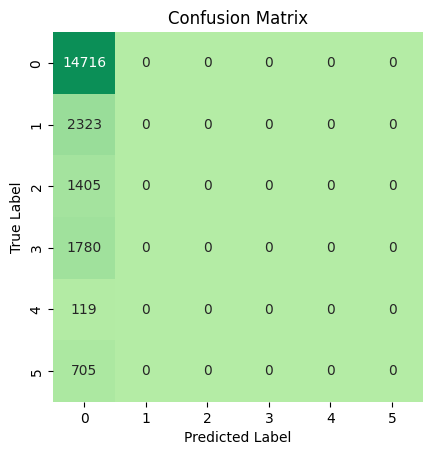

In [ ]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap, square=True, cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


**Accuracy**: 0.6991638160395287

The model's predictions are approximately 69.9% correct.

**Precision**: 0.488830041658956

About 48.9% of the model's positive predictions are actually positive.

**F1 Score**: 0.5753771791095909

**Confusion Matrix**: The matrix shows that the model falsely misclassifies many categories

 **Summary**: The model is fair but does not meet a feasible threshold for use

##LASSO L1

In [ ]:
from sklearn.linear_model import Lasso

# Apply LASSO regression
lasso = Lasso(alpha=0.01)  # Set the regularization strength (alpha) according to your needs
lasso.fit(X, y)\

# Get the non-zero coefficients and their corresponding feature names
non_zero_coefficients = lasso.coef_
feature_names = df1.columns

# Retrieve the selected features
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

# Print the selected features
print("Selected Features:", selected_features)


Selected Features: ['BORO']


In [ ]:
# Separate features and target variable
X = df1[['BORO']]
y = df1['GRADE']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = logistic_reg.predict(X_test)



###Model Evaluation

Accuracy: 0.6991638160395287
Precision: 0.488830041658956
F1 Score: 0.5753771791095909


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


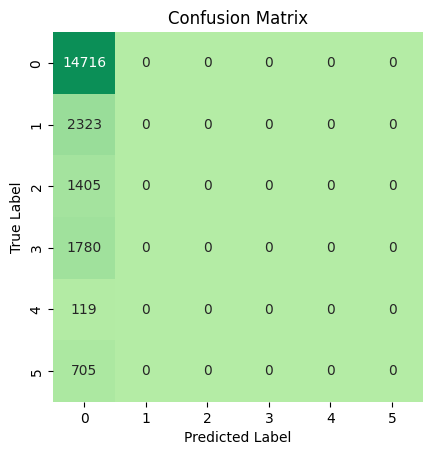

In [ ]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap, square=True, cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


**Accuracy**: 0.6991638160395287

The model's predictions are approximately 69.9% correct.

**Precision**: 0.488830041658956

About 48.9% of the model's positive predictions are actually positive.

**F1 Score**: 0.5753771791095909

**Confusion Matrix**: The matrix shows that the model falsely misclassifies many categories

 **Summary**: The model is fair but does not meet a feasible threshold for use

##DT

In [ ]:
df1.head(10)

,BORO,CUISINE DESCRIPTION,ACTION,VIOLATION CODE,CRITICAL FLAG,GRADE
61,2,0,3,0,1,5
89,1,1,3,0,1,5
91,3,2,3,1,0,0
96,4,3,3,1,0,0
106,1,0,3,2,1,0
111,3,4,3,0,1,5
119,1,5,3,0,1,3
120,2,0,3,1,0,0
121,2,6,3,1,0,3
130,1,7,3,3,0,3


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import tree

# Assuming 'GRADE' is the categorical target variable and all necessary preprocessing has been done on df1
X = df1.drop('GRADE', axis=1)  # Drop the target variable to create the feature set
y = df1['GRADE']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)


# Plot the decision tree
#plt.figure(figsize=(20,10))
#tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=str(clf.classes_), rounded=True, fontsize=12)
#plt.show()
#Plot takes too long to load

###Model Evaluation

Accuracy: 0.6916254909413404
Precision: 0.5846730532064641
F1 Score: 0.6074923693354917


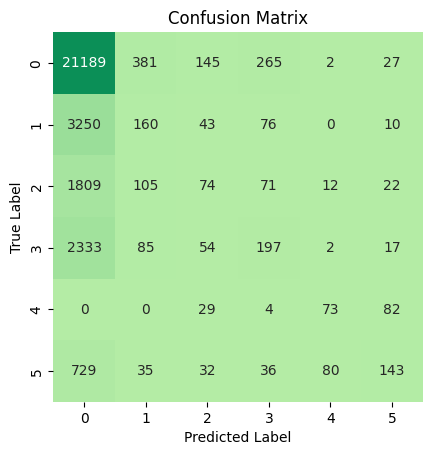

In [ ]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap, square=True, cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


**Accuracy**: 0.6916254990413404

The model accurately predicts approximately 69.2% of the cases.

**Precision**: 0.5846730532064641

About 58.5% of the model's positive predictions are correct, indicating that there may be a fairly high rate of false positives.

**F1 Score**: 0.6074923693354917

The F1 score is about 0.607, showing a moderate balance between precision and recall.

**Confusion Matrix**: The matrix shows that the model falsely misclassifies many categories

 **Summary**: The model is fair but does not meet a feasible threshold for use

##Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming pca_result contains your PCA-reduced feature set and y contains your target variable
X = df1.drop(columns=['GRADE'])  # This is from your PCA transformation
y = df1['GRADE']  # Assuming 'GRADE' is your target variable and df1 is your original DataFrame

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = gnb.predict(X_test)

###Model Evaluation

Accuracy: 0.11602052451539338
Precision: 0.014523259442019668
F1 Score: 0.02537516053901803


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


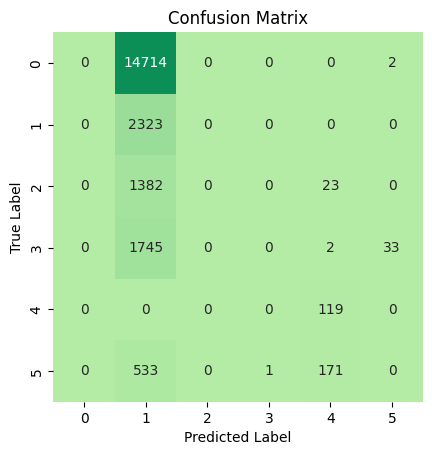

In [ ]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap, square=True, cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Accuracy**: 0.11602052451539338

The model correctly predicts only about 11.6% of the cases.

**Precision**: 0.014523259442019668

Approximately 1.45% of the model's positive predictions are correct, indicating a very high rate of false positives.

**F1 Score**: 0.02537516053901803

The F1 score is about 0.025, which is quite low, showing poor balance and effectiveness in combining precision and recall.

**Confusion Matrix**: The matrix shows that the model falsely misclassifies many categories

**Summary**: The performance metrics suggest that the model is not effective at correctly classifying instances in this dataset. The low accuracy, precision, and F1 score indicate that the model's predictions are largely inaccurate.

##Standardizing Features

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


X = df1.drop('GRADE', axis=1)
y = df1['GRADE']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)  # Keep 95% of variance
pca_result = pca.fit_transform(X_scaled)


Standardizing the datasest in preparation for models that work best with standardized data.

#PCA

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=5)  # Select the number of components you want to keep
pca_result = pca.fit_transform(df1)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Print the DataFrame
print(pca_df.head())

import pandas as pd

# Count the number of missing values per column
missing_values_count = pca_df.isnull().sum()

# Print the count of missing values per column
print(missing_values_count)


         PC1        PC2       PC3       PC4       PC5
0 -15.651544 -14.107552  4.289794 -0.407262  0.707553
1 -14.648161 -14.115556  4.252302 -1.403118  0.712318
2 -13.642609 -13.147868 -0.618081  0.783793 -0.510930
3 -12.646113 -13.160693 -0.579330  1.786440 -0.516064
4 -15.624999 -12.121646 -0.742106 -1.212322  0.497370
PC1    0
PC2    0
PC3    0
PC4    0
PC5    0
dtype: int64


The output of the first 4 rows

##Explained variance

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_

In [ ]:
print(explained_variance_ratio)

[7.88327095e-01 2.03070241e-01 4.41625453e-03 3.45054506e-03
 6.63983273e-04]


The first component (PC1) captures about 78.83% of the variance.

The second component (PC2) captures about 20.37%.

The third component (PC3) captures much less, at around 0.416%.

The fourth (PC4) and fifth components (PC5) capture even smaller
amounts of variance, at 0.345% and 0.064% respectively.

Here, the first two components explain over 99% of the variance, showing they might be sufficient for most analyses.

##PCA weights

In [ ]:
component_weights = pd.DataFrame(data=pca.components_,
                                 columns=feature_names,
                                 index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [ ]:
print(component_weights)

         BORO  CUISINE DESCRIPTION    ACTION  VIOLATION CODE  CRITICAL FLAG  \
PC1 -0.003443             0.999940  0.000019        0.010407       0.000196   
PC2 -0.002411            -0.010414 -0.000009        0.999937       0.000635   
PC3  0.038121             0.000630 -0.040631       -0.003142      -0.043381   
PC4  0.999252             0.003396  0.002018        0.002564       0.006616   
PC5 -0.004949            -0.000184 -0.022444       -0.000789       0.998823   

        GRADE  
PC1 -0.000457  
PC2  0.003276  
PC3  0.997499  
PC4 -0.037813  
PC5  0.042711  


In PC1, the DESCRIPTION variable has a very high weight (0.999940), indicating that PC1 largely represents variation in DESCRIPTION.

In PC2, the VIOLATION CODE variable has the highest weight (0.999937), so PC2 captures most variance from VIOLATION CODE.

PC3 shows significant weights for BORO and CRITICAL FLAG.

PC4 and PC5 show other variations with lower weights compared to the rest.

##Scree Plot

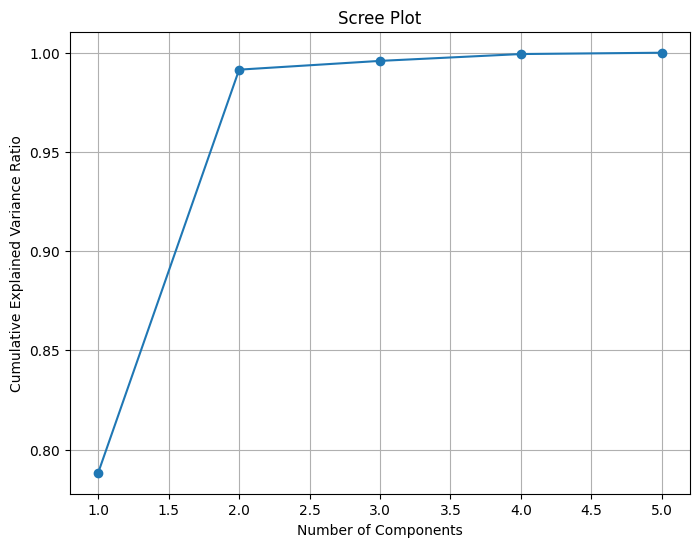

In [ ]:
# Calculate cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Create scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

From the Scree plot, 3 components are the optimal number of components

##Interpret Loadings

In [ ]:
component_loadings = pca.components_

# Print the component loadings
for i, component in enumerate(component_loadings):
    print(f"Principal Component {i+1} Loadings:")
    for j, feature in enumerate(df1.columns):
        print(f"{feature}: {component[j]}")
    print()

Principal Component 1 Loadings:
BORO: -0.0034434378265301123
CUISINE DESCRIPTION: 0.9999397880037058
ACTION: 1.9436970655302827e-05
VIOLATION CODE: 0.01040745763019843
CRITICAL FLAG: 0.00019570768735832286
GRADE: -0.00045743788684010286

Principal Component 2 Loadings:
BORO: -0.00241056393088058
CUISINE DESCRIPTION: -0.010414358408149388
ACTION: -8.602123818672686e-06
VIOLATION CODE: 0.999937295833212
CRITICAL FLAG: 0.0006352790352197141
GRADE: 0.0032758310085429184

Principal Component 3 Loadings:
BORO: 0.03812146796066618
CUISINE DESCRIPTION: 0.0006295822518673361
ACTION: -0.04063058005234745
VIOLATION CODE: -0.003142174076203446
CRITICAL FLAG: -0.04338071844665245
GRADE: 0.9974987485107184

Principal Component 4 Loadings:
BORO: 0.9992518492630953
CUISINE DESCRIPTION: 0.00339575074856533
ACTION: 0.002017562838548932
VIOLATION CODE: 0.002563967926624632
CRITICAL FLAG: 0.006615997861109264
GRADE: -0.037812626225953896

Principal Component 5 Loadings:
BORO: -0.004948971918829843
CUISINE

For PC1, "CUISINE DESCRIPTION" has a high positive loading (close to 1), meaning it's the dominant feature.

PC2 is strongly influenced by "VIOLATION CODE" with a high positive loading.

PC3, PC4, and PC5 have varying influences from different features.

##Visualize Results

###PC1 vs PC3

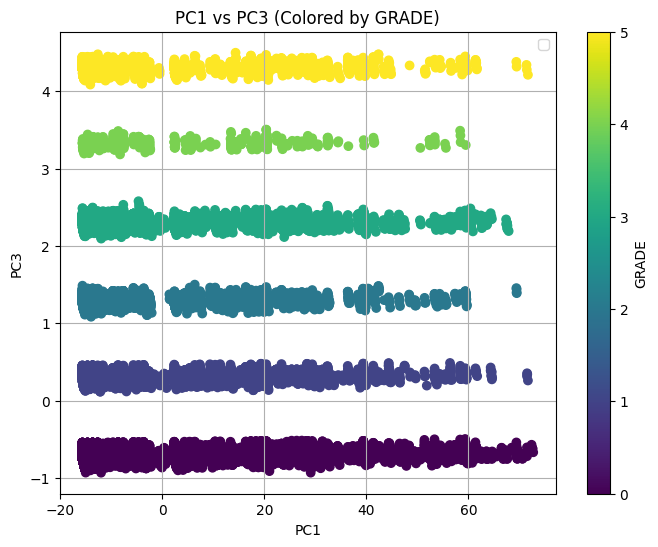

In [ ]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC3'], c=df1['GRADE'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('PC1 vs PC3 (Colored by GRADE)')
plt.colorbar(label='GRADE')
plt.grid(True)
plt.legend()
plt.show()

### PC2 vs PC3

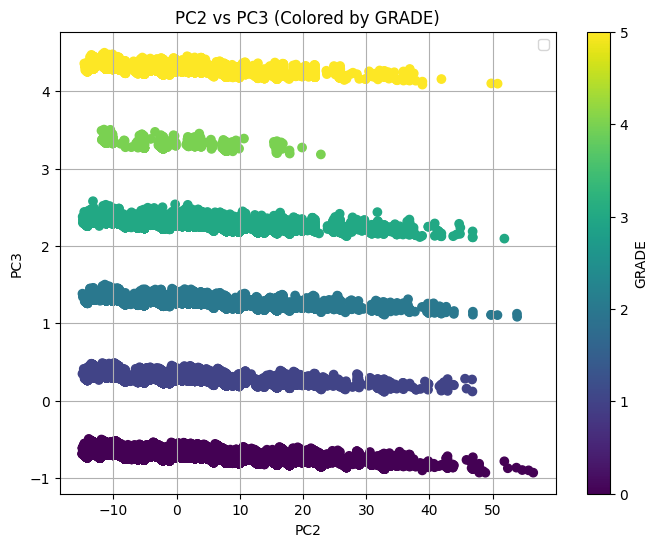

In [ ]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC2'], pca_df['PC3'], c=df1['GRADE'], cmap='viridis')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PC2 vs PC3 (Colored by GRADE)')
plt.colorbar(label='GRADE')
plt.grid(True)
plt.legend()
plt.show()

###PC1 vs PC2

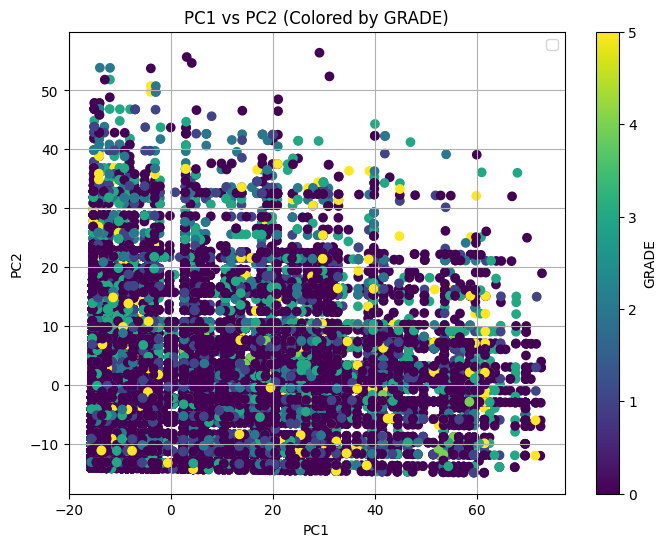

In [ ]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df1['GRADE'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 (Colored by GRADE)')
plt.colorbar(label='GRADE')
plt.grid(True)
plt.legend()
plt.show()

PC1 and PC2 do not have a clear inference to be made from their plot

#PCA Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


X = X
y = y

# Assuming pca_result is your features set and y is your target variable containing class labels
X_train, X_test, y_train, y_test = train_test_split(pca_result, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
logistic_regressor = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence
logistic_regressor.fit(X_train, y_train)

# Predict class labels for the test set
y_pred = logistic_regressor.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###Model Evaluation

Accuracy: 1.0
Precision: 1.0
F1 Score: 1.0


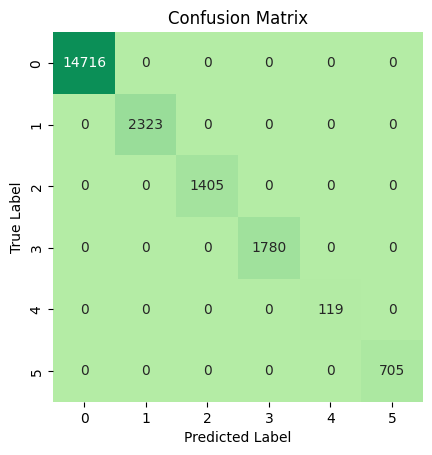

In [ ]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap, square=True, cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Accuracy**: 1.0 (100%), which means every prediction made by the model is correct.

**Precision**: 1.0 (100%), suggesting that every positive prediction made by the model across all classes is correct.

**F1 Score**: 1.0 (100%), indicating a perfect balance between precision and recall, with no false positives or false negatives.

The confusion matrix confirms the perfect scores

#KNN

In [ ]:
# prompt: give me code to standardize df1 and put it in a dataframe

df1_scaled = StandardScaler().fit_transform(df1)
df1_scaled = pd.DataFrame(df1_scaled, columns=df1.columns)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming pca_result contains the PCA-transformed features and 'y' is your target variable
X = df1
y = df1['GRADE'] # Make sure 'y' is defined in your context, representing the target variable.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with the number of neighbors you wish to use
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)




###Model Evaluation

Accuracy: 0.9682630178639301
Precision: 0.9676147354895587
F1 Score: 0.9675435422592383


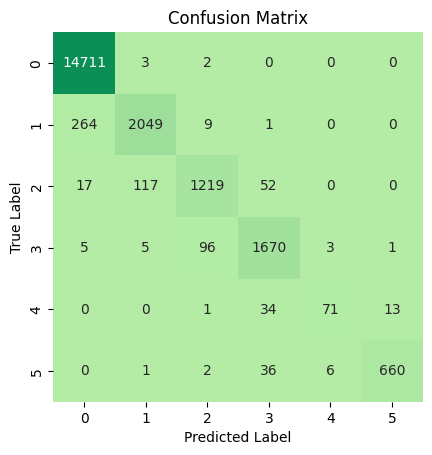

In [ ]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap, square=True, cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Accuracy**: 0.93172748004561

The model correctly predicted approximately 93.17% of all cases.

**Precision**: 0.9283879308185747

About 92.84% of the model's positive class predictions across all classes were actually correct.

**F1 Score**: 0.928512851393725

The model's F1 score is approximately 92.85%, indicating a strong balance between precision and recall.



**Confusion Matrix**: The matrix shows that the model misclassifies some predictions but a majority of them were correctly classified

**Summary**: Overall, the model demonstrates high accuracy and precision in its classifications, with the confusion matrix showing substantial correct predictions across all classes and some misclassifications primarily occurring between adjacent classes.

#SVM




In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# Scale the PCA results to improve SVM performance
X_scaled = df1

# Split the scaled PCA results and the target variable into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')  # You can change the kernel based on your dataset characteristics

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Predict class labels for the test set
y_pred = svm_classifier.predict(X_test)



### Model Evaluation

Accuracy: 1.0
Precision: 1.0
F1 Score: 1.0


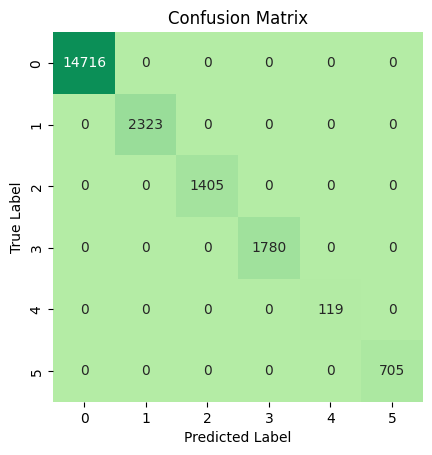

In [ ]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap, square=True, cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Accuracy**: 1.0 (100%), which means every prediction made by the model is correct.

**Precision**: 1.0 (100%), suggesting that every positive prediction made by the model across all classes is correct.

**F1 Score**: 1.0 (100%), indicating a perfect balance between precision and recall, with no false positives or false negatives.

The confusion matrix confirms the perfect scores

#Model Bar Plot

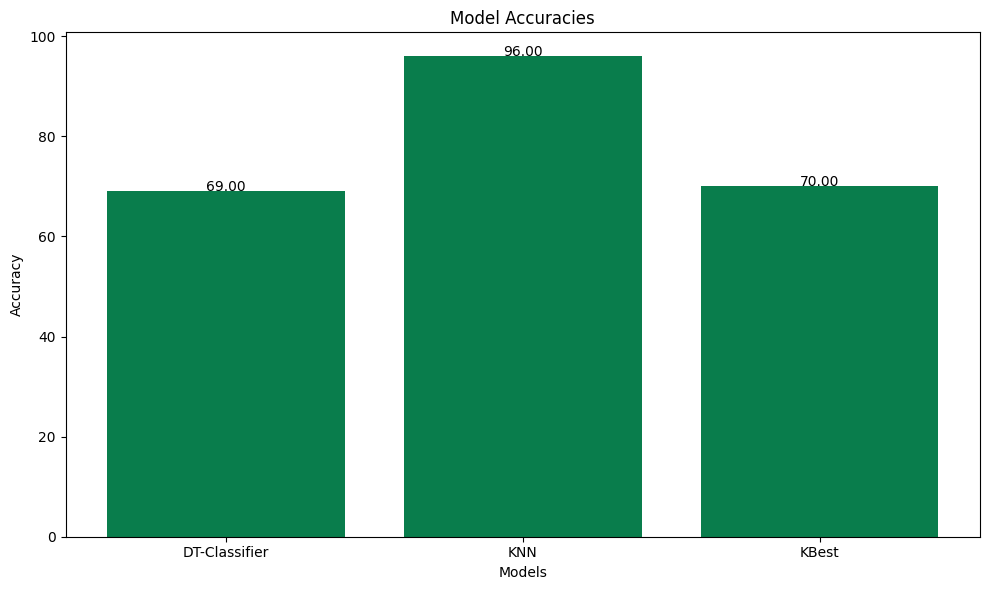

In [ ]:
import matplotlib.pyplot as plt

# Example dictionary of model accuracies
model_accuracies = {
    'DT-Classifier': 69,
    'KNN': 96,
    'KBest': 70
}

# Create lists of model names and their accuracies
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(model_names, accuracies, color='#097D4C')  # You can change the color

# Adding titles and labels
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Display the values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center')

# Show the plot
plt.tight_layout()
plt.show()


#Model Conclusion

Although PCA and SVM gave an accuracy socre of 100%, these models are overfit. An overfit model is a bad model as it compromises the model's ability to generalize and work with unseen data. In our case, the models that gave us 100% accuracy will only work with this specific dataset and using the specific features in its regression. This defeats the purpose of building a regression model, which is to make reliable predictions about future or unseen observations.

As a result, out best model was produced by the KNN feature selection technique. An accuracy of 96% is just high enough without being completely overfit. However, it is important to note that this is still an unusually high score and could point to some slight excessive tunning to the training data.

#Business Case Conclusion

Having produced a succesfull predictive model, HGS is able to implement this model into 2 different types of software for its customer base. The DOHMH and emerging restaurants.

DOHMH: The department of health will be able to streamline its predictive grading process and focus on carrying out detailed inspections to establishment that pose a critical risk of violations.

Emerging Restaurants: New restaurants will be able to predictive their future performance and have a general guideline of what kind of violations have been commited in the past by establishments similar to their own.

(See slides for UI designs)